In [10]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay, hinge_loss




In [2]:
cifar = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [3]:
train_images = train_images.reshape(train_images.shape[0],32*32*3)
test_images = test_images.reshape(test_images.shape[0],32*32*3)

In [4]:
train_images.shape

(50000, 3072)

In [5]:
test_images.shape

(10000, 3072)

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [7]:
pipe = Pipeline([('scaler',MinMaxScaler()) , ('classifier', SVC(kernel='rbf', C = 1) )])
pipe.fit(train_images[:6000],train_labels.ravel()[:6000])
predict_test = pipe.predict(test_images)

0.4479
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1000
           1       0.56      0.46      0.51      1000
           2       0.34      0.36      0.35      1000
           3       0.33      0.23      0.27      1000
           4       0.37      0.38      0.37      1000
           5       0.39      0.36      0.37      1000
           6       0.43      0.52      0.47      1000
           7       0.52      0.42      0.47      1000
           8       0.54      0.63      0.58      1000
           9       0.48      0.57      0.52      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.44     10000
weighted avg       0.45      0.45      0.44     10000



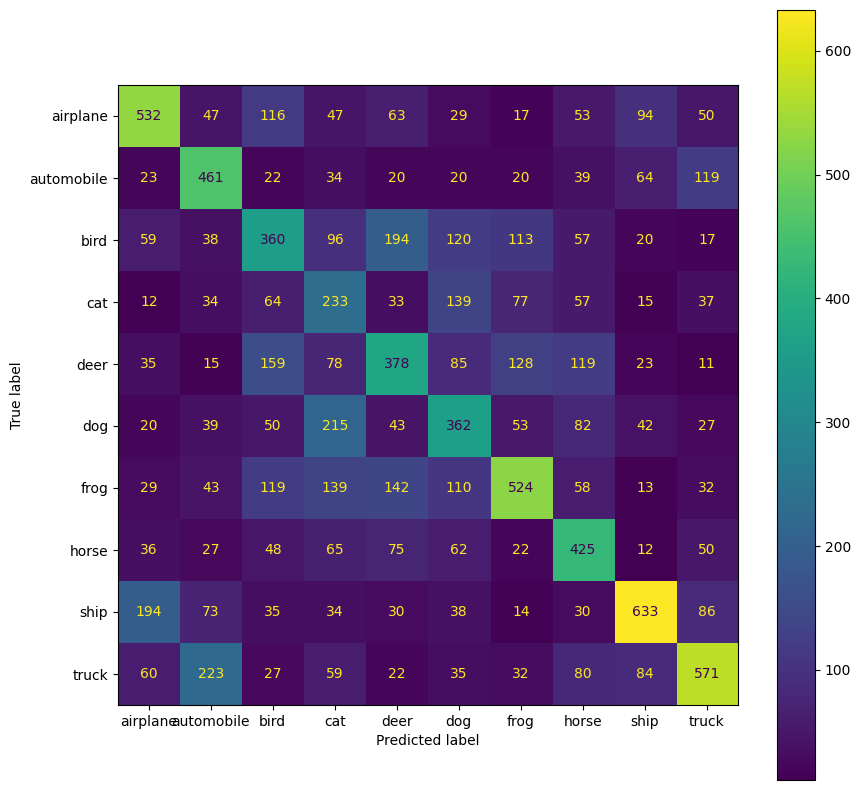

In [8]:
print(accuracy_score(test_labels, predict_test))
print(classification_report(test_labels, predict_test))

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cm=confusion_matrix(predict_test,test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);